In [2]:
!git clone https://github.com/vinayakShenoy/DL4CV.git

Cloning into 'DL4CV'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 21 (delta 2), reused 17 (delta 1), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [3]:
%cd DL4CV/Code/

/content/DL4CV/Code


In [6]:
!pip install import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=54db078530ead593c0017fcc123863a795f958e688cfe4354bfa85b1f480cffd
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [13]:
import import_ipynb
from LeNet import LeNet
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [8]:
print("INFO accessing MNIST")
((trainX, trainY), (testX, testY)) = mnist.load_data()

if K.image_data_format()=="channels_first":
    trainX = trainX.reshape((trainX.shape[0], 1, 28, 28))
    testX = testX.reshape((testX.shape[0], 1, 28, 28))
else:
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))

INFO accessing MNIST
11493376/11490434 [==============================] - 0s 0us/step


In [9]:
trainX = trainX.astype("float32")/255.0
testX = testX.astype("float32")/255.0
le = LabelBinarizer()
trainY = le.fit_transform(trainY)
testY = le.fit_transform(testY)

In [10]:
print("INFO compiling model")
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01),
             metrics=["accuracy"])

print("INFO training network")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=128, 
             epochs=20, verbose=1)

INFO compiling model
INFO training network
Epoch 1/20
469/469 [==============================] - 19s 39ms/step - loss: 0.4446 - accuracy: 0.8710 - val_loss: 0.1594 - val_accuracy: 0.9518
Epoch 2/20
469/469 [==============================] - 18s 39ms/step - loss: 0.1142 - accuracy: 0.9663 - val_loss: 0.0820 - val_accuracy: 0.9746
Epoch 3/20
469/469 [==============================] - 18s 39ms/step - loss: 0.0745 - accuracy: 0.9776 - val_loss: 0.0917 - val_accuracy: 0.9696
Epoch 4/20
469/469 [==============================] - 18s 39ms/step - loss: 0.0557 - accuracy: 0.9832 - val_loss: 0.0561 - val_accuracy: 0.9817
Epoch 5/20
469/469 [==============================] - 18s 39ms/step - loss: 0.0434 - accuracy: 0.9863 - val_loss: 0.0650 - val_accuracy: 0.9792
Epoch 6/20
469/469 [==============================] - 18s 39ms/step - loss: 0.0343 - accuracy: 0.9895 - val_loss: 0.0482 - val_accuracy: 0.9850
Epoch 7/20
469/469 [==============================] - 18s 39ms/step - loss: 0.0275 - accuracy

In [11]:
print("INFO evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1),
                           target_names=[str(x) for x in le.classes_]))

INFO evaluating network...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



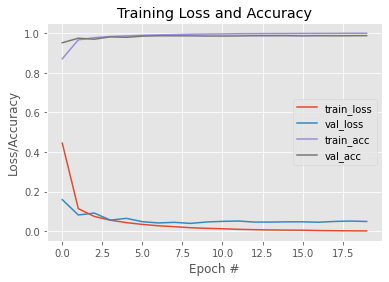

In [14]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()